## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from tensorflow.keras import optimizers, losses

import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
df = pd.read_csv('energydata_complete.csv', infer_datetime_format=True, index_col='date')
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

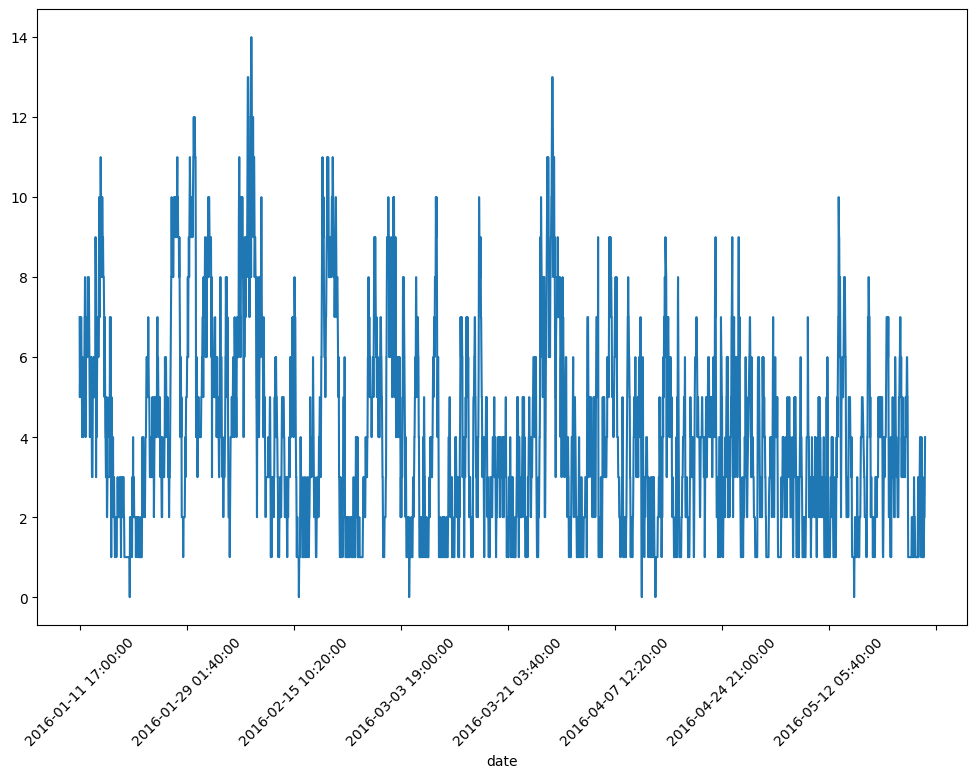

In [4]:
df['Windspeed'].plot(figsize=(12,8))
plt.xticks(rotation=45);

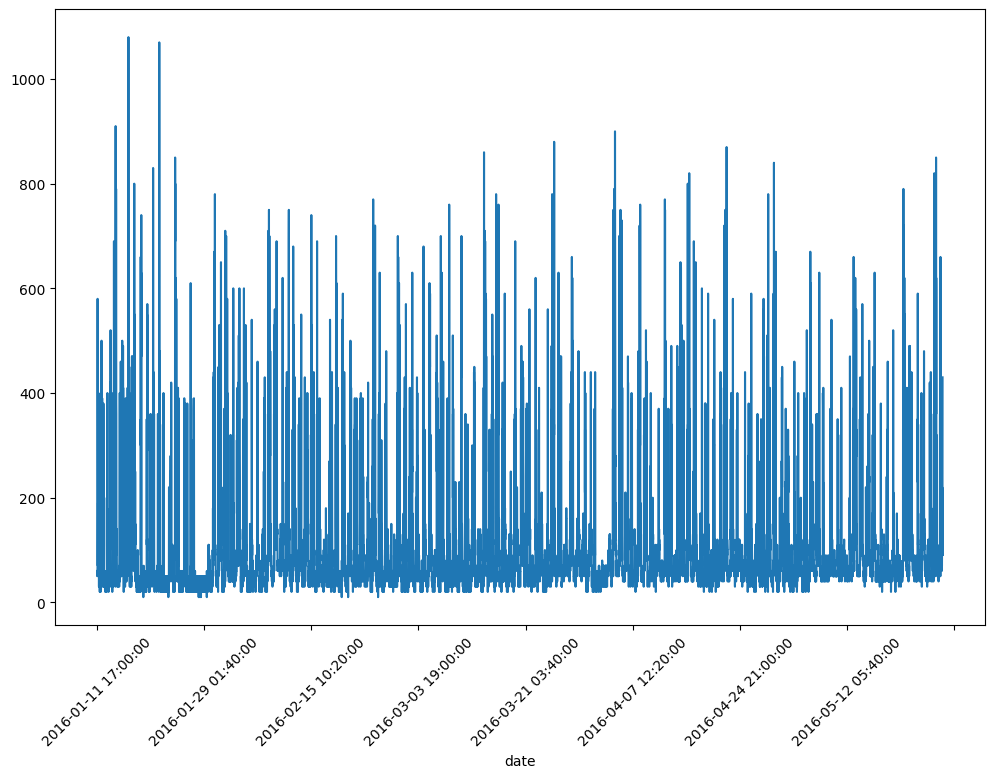

In [5]:
df['Appliances'].plot(figsize=(12,8));
plt.xticks(rotation=45);

## Train Test Split

In [6]:
len(df)

19735

In [7]:
df.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [8]:
df.tail(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:40:00,270,10,25.5,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.5,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.5,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [9]:
df.loc['2016-05-01':]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.200000,18.390000,41.400000,23.200000,36.400000,19.73,37.730000,...,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.172500,18.390000,41.500000,23.133333,36.466667,19.70,37.663333,...,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.090000,18.323333,41.500000,23.200000,36.500000,19.70,37.590000,...,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.090000,18.290000,41.500000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.030000,18.290000,41.560000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.70,45.590000,...,23.200000,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.70,45.590000,...,23.200000,46.790000,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.70,45.730000,...,23.200000,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [10]:
df = df.loc['2016-05-01':]

In [11]:
df = df.round(2)

In [12]:
len(df)

3853

In [13]:
# How many rows per day? We know its every 10 minutes
24 * 60 / 10

144.0

In [14]:
test_days = 2

In [15]:
test_index = test_days * 144
test_index

288

In [16]:
train_set = df.iloc[:-test_index]
test_set = df.iloc[-test_index:]

In [17]:
train_set

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.40,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.50,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.50,23.20,36.50,19.70,37.59,...,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81
2016-05-01 00:30:00,50,0,21.10,38.09,18.29,41.50,23.20,36.50,19.70,37.50,...,19.17,38.50,4.25,763.75,87.00,2.50,34.50,2.25,47.00,47.00
2016-05-01 00:40:00,60,0,21.10,38.03,18.29,41.56,23.20,36.50,19.70,37.50,...,19.17,38.63,4.23,763.77,87.33,2.67,32.67,2.27,8.06,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-25 17:20:00,120,0,24.50,37.22,24.13,34.30,25.20,37.64,24.36,38.29,...,21.89,37.03,16.17,756.17,52.67,1.33,31.33,6.43,33.46,33.46
2016-05-25 17:30:00,190,0,24.50,37.16,24.10,34.30,25.20,37.55,24.29,38.16,...,21.89,37.20,16.25,756.15,53.50,1.50,33.50,6.75,0.43,0.43
2016-05-25 17:40:00,160,0,24.50,37.43,24.10,34.43,25.14,37.28,24.29,38.00,...,21.89,37.33,16.33,756.13,54.33,1.67,35.67,7.07,16.67,16.67


In [18]:
test_set

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


## Normalization

In [19]:
scaler = MinMaxScaler()

In [20]:
train_set_scaled = scaler.fit_transform(train_set)
test_set_scaled = scaler.transform(test_set)

## Time Series Generator

In [21]:
len(test_set)

288

In [22]:
length = 144
batch_size = 1

generator = TimeseriesGenerator(
    data=train_set_scaled,
    targets=train_set_scaled,
    length=length,
    batch_size=batch_size
)

In [23]:
len(train_set_scaled)

3565

In [24]:
len(generator)

3421

In [25]:
X, y = generator[0]

In [26]:
X

array([[[0.03896104, 0.        , 0.13798978, ..., 0.21301775,
         0.30618371, 0.30618371],
        [0.05194805, 0.        , 0.12947189, ..., 0.21420118,
         0.22473484, 0.22473484],
        [0.03896104, 0.        , 0.12606474, ..., 0.2147929 ,
         0.43626176, 0.43626176],
        ...,
        [0.05194805, 0.        , 0.32367973, ..., 0.15680473,
         0.43406044, 0.43406044],
        [0.05194805, 0.        , 0.30834753, ..., 0.14970414,
         0.64078447, 0.64078447],
        [0.03896104, 0.        , 0.30834753, ..., 0.14319527,
         0.75185111, 0.75185111]]])

In [27]:
y

array([[0.03896104, 0.        , 0.30834753, 0.29439421, 0.16038492,
        0.49182278, 0.0140056 , 0.36627907, 0.24142857, 0.24364791,
        0.12650602, 0.36276002, 0.12      , 0.28205572, 0.06169297,
        0.15759185, 0.34582624, 0.39585974, 0.09259259, 0.39649608,
        0.18852459, 0.96052632, 0.59210526, 0.1       , 0.58333333,
        0.13609467, 0.4576746 , 0.4576746 ]])

In [28]:
train_set_scaled

array([[0.03896104, 0.        , 0.13798978, ..., 0.21301775, 0.30618371,
        0.30618371],
       [0.05194805, 0.        , 0.12947189, ..., 0.21420118, 0.22473484,
        0.22473484],
       [0.03896104, 0.        , 0.12606474, ..., 0.2147929 , 0.43626176,
        0.43626176],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

## Creating the Model

In [29]:
train_set_scaled.shape

(3565, 28)

In [30]:
optimizer = optimizers.Adam(learning_rate=0.001)
loss = losses.MeanSquaredError()

In [31]:
model = Sequential()

model.add(LSTM(units=25 , activation='relu', input_shape=(length, train_set_scaled.shape[1])))
model.add(Dense(units=train_set_scaled.shape[1]))

model.compile(
    optimizer=optimizer,
    loss=loss,
)

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 25)             │         5,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │           728 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,128 (23.94 KB)

 Trainable params: 6,128 (23.94 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [33]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2
)

In [34]:
length = 144
batch_size = 1

In [35]:
validation_generator = TimeseriesGenerator(
    data=test_set_scaled,
    targets=test_set_scaled,
    length=length,
    batch_size=batch_size
)

In [36]:
model.fit(
    generator,
    validation_data=validation_generator,
    epochs=2,
    callbacks=[early_stopping]
)

Epoch 1/2
3421/3421 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - loss: 0.0337 - val_loss: 0.0171
Epoch 2/2
3421/3421 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - loss: 0.0109 - val_loss: 0.0138


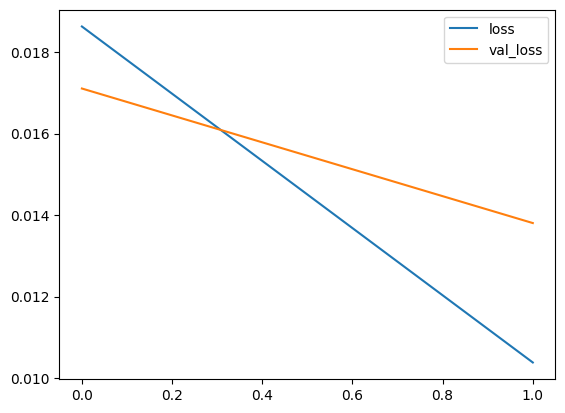

In [37]:
losses = pd.DataFrame(model.history.history)
losses.plot();

## Evaluation on Test Data

In [38]:
num_of_features = train_set_scaled.shape[1]
test_predictions = []

first_eval_batch = train_set_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, num_of_features))

for i in range(len(test_set)):
    current_prediction = model.predict(current_batch)[0]
    test_predictions.append(current_prediction)
    current_batch = np.append(current_batch[:,1:,:], [[current_prediction]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

In [39]:
test_predictions

[array([ 0.0768685 , -0.01455709,  0.6456533 ,  0.4306356 ,  0.5857255 ,
         0.4258588 ,  0.35594255,  0.46368426,  0.7205574 ,  0.3950394 ,
         0.41774538,  0.35364395,  0.6394347 , -0.00236067,  0.61623424,
         0.40670004,  0.50166315,  0.40154964,  0.5821936 ,  0.42094398,
         0.62842155,  0.48665023,  0.3917418 ,  0.20930886,  0.5326612 ,
         0.50674564,  0.51029336,  0.5643752 ], dtype=float32),
 array([ 0.07972037, -0.01689316,  0.6483303 ,  0.43375397,  0.5891437 ,
         0.42911807,  0.3497333 ,  0.46674836,  0.71680945,  0.3980787 ,
         0.42567506,  0.3553171 ,  0.64031017,  0.00890166,  0.61269176,
         0.41467142,  0.49288273,  0.40682086,  0.58926433,  0.43221155,
         0.6264229 ,  0.47522092,  0.3916356 ,  0.22004718,  0.5303678 ,
         0.5005555 ,  0.5164361 ,  0.55775064], dtype=float32),
 array([ 0.08113185, -0.0163891 ,  0.65165293,  0.43562335,  0.5927763 ,
         0.4301417 ,  0.34634742,  0.4692909 ,  0.7153515 ,  0.398157

In [40]:
test_set_scaled

array([[0.19480519, 0.        , 0.70017036, ..., 0.53372781, 0.76305783,
        0.76305783],
       [0.37662338, 0.        , 0.70017036, ..., 0.52840237, 0.62337402,
        0.62337402],
       [0.12987013, 0.        , 0.70017036, ..., 0.52366864, 0.08785271,
        0.08785271],
       ...,
       [0.32467532, 0.33333333, 0.87052811, ..., 0.86804734, 0.58415049,
        0.58415049],
       [0.51948052, 0.33333333, 0.87052811, ..., 0.86568047, 0.12627577,
        0.12627577],
       [0.53246753, 0.33333333, 0.87052811, ..., 0.86390533, 0.68260957,
        0.68260957]])

In [41]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[79.18874256, -0.43671258, 24.17998491, ...,  7.16400126,
        25.50935943, 28.21182983],
       [81.38468526, -0.50679473, 24.19569869, ...,  7.05938821,
        25.81631192, 27.8807996 ],
       [82.4715212 , -0.49167294, 24.21520271, ...,  6.98360814,
        26.0937242 , 27.60556158],
       ...,
       [31.57441404, -6.62229627, 27.11208267, ..., 10.45385008,
        25.95865176, 28.52140037],
       [31.37721222, -6.65025786, 27.12457755, ..., 10.50460181,
        25.97494981, 28.53783841],
       [31.17472954, -6.67856231, 27.13723759, ..., 10.55590655,
        25.99143252, 28.55471725]])

In [42]:
test_set

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


In [43]:
true_predictions = pd.DataFrame(
    data=true_predictions,
    columns=test_set.columns
)
true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,79.188743,-0.436713,24.179985,38.927074,24.693997,34.781631,24.641430,37.542906,24.243902,37.426669,...,22.243846,38.980275,17.033486,755.195625,53.772378,2.093089,36.959672,7.164001,25.509359,28.211830
1,81.384685,-0.506795,24.195699,39.013297,24.736622,34.891241,24.597096,37.600879,24.217666,37.493655,...,22.282027,39.224668,16.984718,754.935037,53.764305,2.200472,36.822067,7.059388,25.816312,27.880800
2,82.471521,-0.491673,24.215203,39.064986,24.781920,34.925665,24.572921,37.648984,24.207461,37.495386,...,22.305848,39.463220,16.971044,754.704592,53.519500,2.303494,36.856296,6.983608,26.093724,27.605562
3,83.631360,-0.490214,24.234490,39.087205,24.830234,34.935071,24.562205,37.690730,24.200750,37.491838,...,22.328412,39.674557,16.992098,754.493943,53.183192,2.410732,36.943271,6.935536,26.320423,27.374071
4,84.778244,-0.501409,24.254370,39.092498,24.883511,34.918441,24.560925,37.722630,24.198131,37.484305,...,22.350485,39.852201,17.042087,754.293214,52.778787,2.516904,37.038575,6.906508,26.500139,27.183340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,31.953463,-6.567341,27.087565,39.557751,28.068185,32.737129,26.675698,37.905423,27.098350,37.344328,...,24.690459,41.168603,25.494451,737.415460,34.464087,2.929736,36.231309,10.353976,25.926592,28.489787
284,31.766447,-6.594662,27.099745,39.618257,28.094108,32.767162,26.684925,37.942618,27.117878,37.381568,...,24.703042,41.220948,25.527532,737.337100,34.446697,2.908592,36.291734,10.403645,25.942532,28.505382
285,31.574414,-6.622296,27.112083,39.679209,28.120396,32.797167,26.694272,37.979928,27.137691,37.418899,...,24.715789,41.273734,25.560902,737.257821,34.429244,2.887244,36.352881,10.453850,25.958652,28.521400
286,31.377212,-6.650258,27.124578,39.740615,28.147059,32.827134,26.703742,38.017355,27.157796,37.456318,...,24.728707,41.326962,25.594577,737.177598,34.411659,2.865687,36.414779,10.504602,25.974950,28.537838


## Calculate RMSE

In [44]:
np.sqrt(mean_squared_error(test_set['Appliances'], true_predictions['Appliances']))

165.96072816229773